Test cases from this list are prepended with "A" - Other notebooks specifying additional tests should prepend with "B", "C", "D", etc

Basic
1. ALA_ALA (cterm cap/nterm cap/charged terms)
2. ALA_ALA (uncapped)
3. HIS_PRO (diff protonation states)
4. CYX_ALA_ALA_CYX
5. ALA_ASP/ASH
6. ALA_LYS/LYN
7. ALA_ALA LIG
8. ALA ALA (one/two chains, one/two molecules, maybe TER between)
9. ALA ALA (differ only by insertion code)
10. ALA ALA (same residue info, noncontiguous)
11. Deprotonated SER and CYX
12. Chelated metal
13. D amino acids (not clear if we should check stereo?)
14. phosphotyrosine (TPO)


Harder
1. ALA_ALA LIG
2. covalent ligand
3. AMBER residue names

Scoring metric
* Same canonical isomeric SMILES
     * Each test should have a "PDB" input and a "reference" input for comparison. 
     * If the reference input is a SMILES doesn't need to be canonicalized
* PDB files MAY have CONECT lines. If so, the test will be run twice, with one run stripping that input
* Ligands will always be called HETATM

# Test case generation
A1

In [33]:
os.mkdir?

In [34]:
import os
try:
    os.mkdir('A1')
except:
    pass

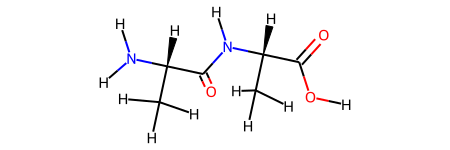

In [21]:
from rdkit import Chem
mol = Chem.MolFromFASTA('AA')
mol = Chem.AddHs(mol, addResidueInfo=True)
mol

In [35]:
Chem.MolToPDBFile(mol, "A1/A1_neutral.pdb")

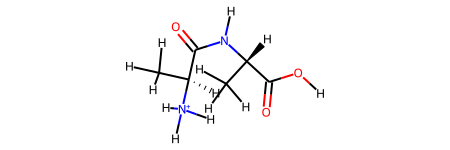

In [46]:
rxn = Chem.rdChemReactions.ReactionFromSmarts(
    "[N:1]([H:2])([H:3])[CX4:4] >> [N+:1]([H:2])([H:3])([H])[CX4:4]"
)
products = rxn.RunReactants([mol])

product = products[0][0]
# Ensure that there's only one chemical structure that comes from the reaction
assert len(set([Chem.MolToSmiles(i[0]) for i in products])) == 1, len(products)
Chem.SanitizeMol(product)
product

In [47]:
print(Chem.MolToPDBBlock(product))

ATOM      1  N   ALA A   1       0.000   0.000   0.000  1.00  0.00           N1+
ATOM      2  H1  ALA A   1       0.000   0.000   0.000  1.00  0.00           H  
ATOM      3  H2  ALA A   1       0.000   0.000   0.000  1.00  0.00           H  
HETATM    4  H1  UNL     1       0.000   0.000   0.000  1.00  0.00           H  
ATOM      5  CA  ALA A   1       0.000   0.000   0.000  1.00  0.00           C  
ATOM      6  C   ALA A   1       0.000   0.000   0.000  1.00  0.00           C  
ATOM      7  CB  ALA A   1       0.000   0.000   0.000  1.00  0.00           C  
ATOM      8  H3  ALA A   1       0.000   0.000   0.000  1.00  0.00           H  
ATOM      9  O   ALA A   1       0.000   0.000   0.000  1.00  0.00           O  
ATOM     10  N   ALA A   2       0.000   0.000   0.000  1.00  0.00           N  
ATOM     11  H4  ALA A   1       0.000   0.000   0.000  1.00  0.00           H  
ATOM     12  H5  ALA A   1       0.000   0.000   0.000  1.00  0.00           H  
ATOM     13  H6  ALA A   1  